Trinôme G1 :    
- AMAZOUZ Sara Selma
- GHENAIET Walid
- MOULAI Mohamed Youcef


---



# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('/content/data.csv', delimiter=',', dtype=float)
data.shape

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X = np.column_stack((intercept,data[:,0]))
print(X.shape)
y = data[:, 1]
print (X)
print (y)

(97, 2)
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1

Text(0, 0.5, 'Bénéfice x1000')

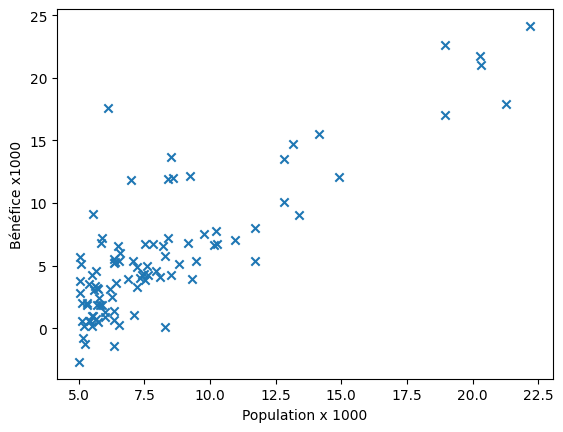

In [ ]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte

    # calculer le coût avec et sans vectorisation,
    # comparer le temps de traitement
    MSE = 0

    ypred = np.empty([y.shape[0]])

    for i in range(len(y)):
      ypred[i] = X[i][1] * theta[1] + theta[0]
      MSE += np.square(y[i] - ypred[i])

    MSE = MSE / y.shape[0]

    return MSE

In [ ]:
theta = np.array([2, 1])
theta = theta.astype(float)

In [ ]:
MSE = computeCostNonVect(X, y, theta)
print(MSE)

28.17437087967424


In [ ]:
def prediction(X, theta):
  return np.dot(X, theta)

In [ ]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte

    # calculer le coût avec et sans vectorisation,
    # comparer le temps de traitement

    return np.square(np.subtract(y, prediction(X, theta))).sum() / y.shape[0]

In [ ]:
MSE = computeCost(X, y, theta)
print(MSE)

28.174370879674225


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération
    # pour afficher le coût en fonction de theta0 et theta1

    thetas = []
    MSEs = []

    for i in range(iterations):

        # feed forward & calcul de la fonction cout
        MSE = computeCost(X, y, theta)

        # sauvegarde des couts et des poids
        MSEs.append(MSE)
        thetas.append(np.array(theta))

        # calcul des derivees & modification des poids thetas (back propagation)
        for j in range(X.shape[1]):
          d = (-2) * np.dot(np.array(X[:,j]), np.subtract(y, prediction(X, theta))).sum() / y.shape[0]
          theta[j] -= alpha * d

    return np.array(thetas), np.array(MSEs)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
theta = np.array([0, 0])
theta = theta.astype(float)

Calculer le cout initial

In [ ]:
initialCost = computeCost(X, y, theta)
initialCost

64.14546775491135

Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 1000
alpha = 0.01
# Appel
thetas, MSEs = gradientDescent(X, y, theta, alpha, iterations)

Calculer le cout final

In [ ]:
finalCost = computeCost(X, y, thetas[-1])
finalCost

8.955820362935297

In [ ]:
finalThetas = thetas[-1]
finalThetas

array([-3.79423181,  1.18286895])

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

In [ ]:
def plotting(theta):

  plt.scatter(X[:,1],y,marker ='x')
  plt.xlabel('Population x 1000')
  plt.ylabel('Chiffre d\'affaires x1000')
  y_pred = prediction(X,theta)
  plt.plot(X,y_pred)
  plt.show()

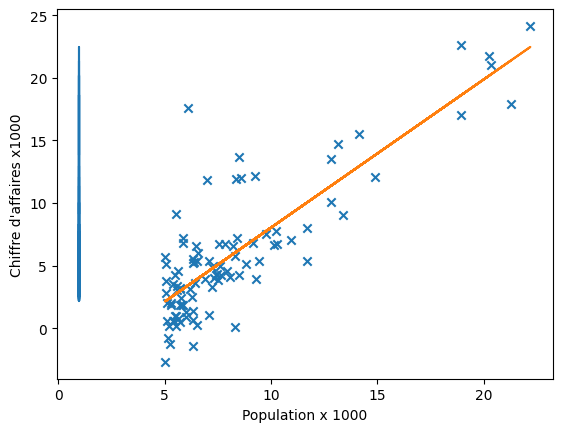

In [ ]:
TH = thetas[-1]
#for i in range(0, len(MSEs), 2):
plotting(TH)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gradient

Fonction hypothèse au fil des itérations

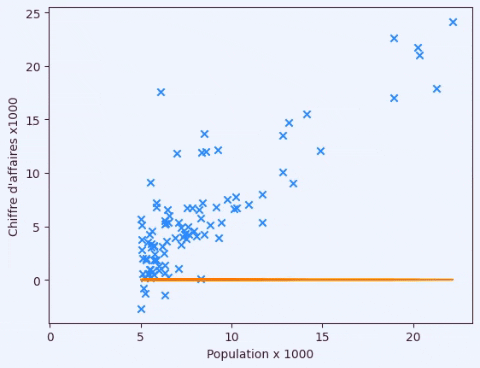

Fonction coût au fil des itérations

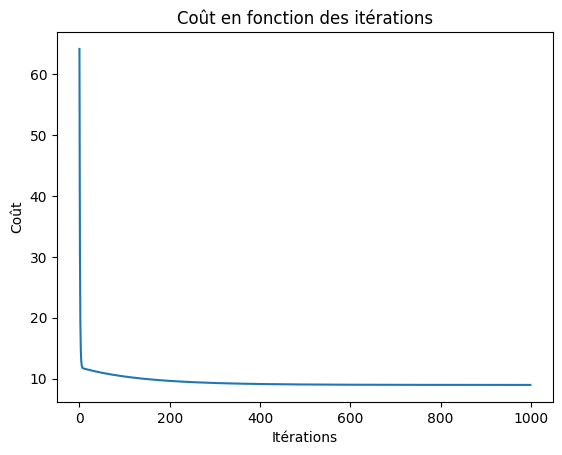

In [ ]:
plt.plot(MSEs)
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.title("Coût en fonction des itérations")
plt.show()

Traçage du coût en fonction de theta0 et theta1

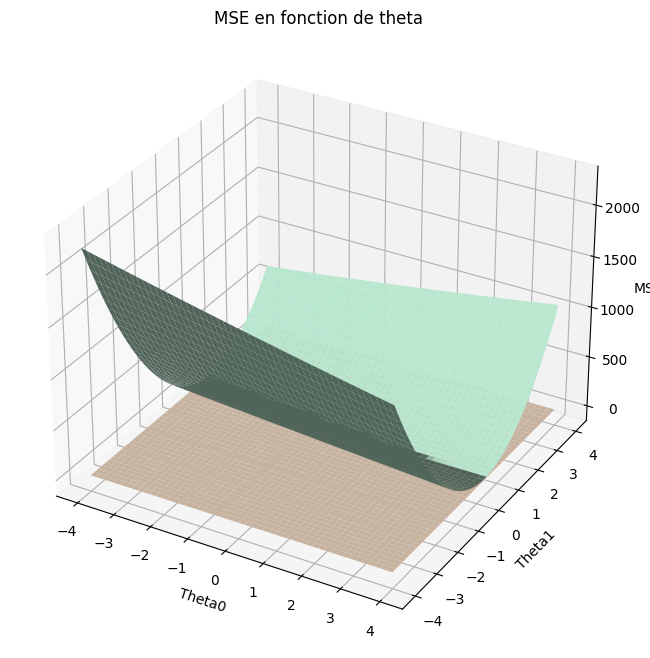

In [ ]:
xt = np.arange(-4, 4, 0.01)
yt = np.arange(-4, 4, 0.01)
thetas0, thetas1 = np.meshgrid(xt, yt)

mse = []
tan = []
deriv = np.array([(-2) * np.subtract(y, prediction(X, thetas[-1])).sum() / y.shape[0], (-2) * np.dot(np.array(X[:,1]), np.subtract(y, prediction(X, thetas[-1]))).sum() / y.shape[0] ])

for t0, t1 in zip(np.ravel(thetas0), np.ravel(thetas1)):
    cost = computeCost(X, y, np.array([t0, t1]))
    tg = deriv[0] * (t0 - thetas[-1][0]) + deriv[1] * (t1 - thetas[-1][1]) + MSEs[-1]
    tan.append(tg)
    mse.append(cost)

mse = np.array(mse)
tan = np.array(tan)
mse = mse.reshape(thetas0.shape)
tan = tan.reshape(thetas0.shape)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(thetas0, thetas1, mse, color='#CCFFE5')
ax.plot_surface(thetas0, thetas1, tan, color='#FFE5CC')

ax.scatter(thetas[-1][0], thetas[-1][1], MSEs[-1], marker = 'x')
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("MSE")
ax.set_title("MSE en fonction de theta")
plt.show()


Prédire des valeurs de y

In [ ]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],TH)
predict1

0.34580952136936594

In [ ]:
predict2 = np.matmul([1, 7],TH)
predict2

4.485850856554389

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
# données
dataMulti = np.genfromtxt('/content/dataMulti.csv', delimiter=',', dtype=float)
print(dataMulti.shape)

(47, 3)


Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

Mise à l'échelle des données

In [ ]:
# on a appliqué une standardisation (StandardScaler)

Normalisation des données en moyenne = 0

In [ ]:
def scaling(X):

  newX = X - np.mean(X, axis=0)
  X_transformed = newX / np.std(newX, axis=0)

  return X_transformed

In [ ]:
# StandardScaler is used here JUST for comparison with our function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((dataMulti.shape[0],1))
X = dataMulti[:,[0,1]]
print()
print('*X not scaled*')
print()
print(X)
scaled = scaler.fit_transform(X)
print()
print("*X scaled with StandardScaler*")
print()
print(scaled)
# to scale
print()
print('*X scaled with scaling() function*')
print()
D = scaling(X)
##########
X = np.column_stack((intercept,X))
X2 = np.column_stack((intercept,D))
print(D)
y = dataMulti[:, -1]


*X not scaled*

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]
 [1.940e+03 4.000e+00]
 [2.000e+03 3.000e+00]
 [1.890e+03 3.000e+00]
 [4.478e+03 5.000e+00]
 [1.268e+03 3.000e+00]
 [2.300e+03 4.000e+00]
 [1.320e+03 2.000e+00]
 [1.236e+03 3.000e+00]
 [2.609e+03 4.000e+00]
 [3.031e+03 4.000e+00]
 [1.767e+03 3.000e+00]
 [1.888e+03 2.000e+00]
 [1.604e+03 3.000e+00]
 [1.962e+03 4.000e+00]
 [3.890e+03 3.000e+00]
 [1.100e+03 3.000e+00]
 [1.458e+03 3.000e+00]
 [2.526e+03 3.000e+00]
 [2.200e+03 3.000e+00]
 [2.637e+03 3.000e+00]
 [1.839e+03 2.000e+00]
 [1.000e+03 1.000e+00]
 [2.040e+03 4.000e+00]
 [3.137e+03 3.000e+00]
 [1.811e+03 4.000e+00]
 [1.437e+03 3.000e+00]
 [1.239e+03 3.000e+00]
 [2.132e+03 4.000e+00]
 [4.215e+03 4.000e+00]
 [2.162e+03 4.000e+00]
 [1.664e+03 2.000e+00]
 [2.238e+03 3.000e+00]
 [2.567e+03 4.000

Appliquer la descente du gradient à plusieurs variables

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [ ]:
theta1 = np.array([0, 0, 0])
theta1 = theta1.astype(float)
print(theta1)

[0. 0. 0.]


In [ ]:
# time library to calculate execution time
import time

**Avec normalisation**

In [ ]:
initialCost1 = computeCost(X2, y, theta1)
initialCost1

131183171489.36171

In [ ]:
# use X2 for scaled values
iterations = 1000
alpha = 0.6
start = time.time()
# Appel
thetas1, MSEs1 = gradientDescent(X2, y, theta1, alpha, iterations)
end = time.time()
print("The time of execution of above program is :",(end-start) * 10**3, "ms")

The time of execution of above program is : 51.880836486816406 ms


In [ ]:
finalCost1 = computeCost(X2, y, theta1)
finalCost1

4086560954.7851405

In [ ]:
finalThetas1 = thetas1[-1]
finalThetas1

array([340412.76595745, 109447.76551898,  -6578.27679028])

**Sans normalisation**

In [ ]:
theta1 = np.array([0, 0, 0])
theta1 = theta1.astype(float)

In [ ]:
initialCost2 = computeCost(X, y, theta1)
initialCost2

131183171489.36171

In [ ]:
# use X for unscaled values
alpha2 = 0.0000001
start = time.time()
thetas2, MSEs2 = gradientDescent(X, y, theta1, alpha2, iterations)
end = time.time()
print("The time of execution of above program is :",(end-start) * 10**3, "ms")

The time of execution of above program is : 58.4416389465332 ms


In [ ]:
finalCost2 = computeCost(X, y, theta1)
finalCost2

4795584533.070229

In [ ]:
finalThetas2 = thetas2[-1]
finalThetas2

array([  1.9763023 , 165.37760068,   3.33373915])

**Remarques** :
- Pour le même nombre d'itérations, Gradient descent est plus rapide **avec** la normalisation
- Avec la normalisation, on est parvenu à avoir un coût plus petit

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Régression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X,y)

LinearRegression()

Comparaison des thetas & du coût

In [ ]:
print("thetas :")
print('SKLearn = ', np.array([LR.intercept_, LR.coef_[1]]))
print('Ours    = ', finalThetas)
print("MSE :")
print('SKLearn = ', computeCost(X, y, np.array([LR.intercept_, LR.coef_[1]])))
print('Ours    = ', finalCost)

thetas :
SKLearn =  [-3.89578088  1.19303364]
Ours    =  [-3.79423181  1.18286895]
MSE :
SKLearn =  8.953942751950356
Ours    =  8.955820362935297


Comparaison des fonctions d'hypothèse

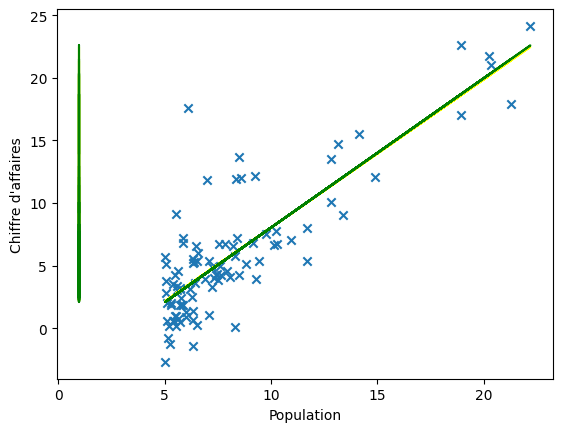

In [ ]:
y_pred = prediction(X, finalThetas)
y_pred2 = prediction(X, np.array([LR.intercept_, LR.coef_[1]]))
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population')
plt.ylabel('Chiffre d\'affaires')
plt.plot(X, y_pred, color='yellow', label='Notre algorithme')
plt.plot(X, y_pred2, color='green', label='SKLearn algorithme')
plt.show()

# Régression linéaire à plusieurs variables

In [ ]:
LR2 = LinearRegression()
LR2.fit(X2,y)

LinearRegression()

Comparaison des thetas & du coût

In [ ]:
# dataMulti coeff by SKLearn model
print("thetas :")
print('SKLearn = ', np.array([LR2.intercept_, LR2.coef_[1], LR2.coef_[2]]))
print('Ours    = ', finalThetas1)
print("MSE :")
print('SKLearn = ', computeCost(X2, y, np.array([LR2.intercept_, LR2.coef_[1], LR2.coef_[2]])))
print('Ours    = ', finalCost1)

thetas :
SKLearn =  [340412.76595745 109447.76551898  -6578.27679028]
Ours    =  [340412.76595745 109447.76551898  -6578.27679028]
MSE :
SKLearn =  4086560954.7851415
Ours    =  4086560954.7851405


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
# ajouter à la fonction Gradient Descent une condition d'arrêt: atteinte du coût minimal
# alpha variable et pas constante
# utiliser Stochastic Gradient Descent pour ne pas tomber dans le piege du minimum local

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance